# Convolutional Autoencoder for SDSS to DES

## Creating the convolutional autoencoder

In [2]:
# This is the architecture of the neural network.
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(80, 80, 4))  # adapt this if using `channels_first` image data format
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x= Conv2D(32, (3,3), activation='relu', padding='same')(x)
x= Conv2D(64, (3,3), activation='relu', padding='same')(x)
x= Conv2D(128, (3,3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
#autoencoder is the decoded form of the encoded compressed image. 
autoencoder=Model(input_img, decoded)

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

This is the summary of the architecture of the network. As, we can see that the input is 4 layer multicolor images while the output is the 3 layer multicolor images. This is because a mask has been attached on all the images to remove unnecessary disturbances.  

In [5]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 80, 80, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 80, 80, 128)       4736      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 80, 80, 64)        73792     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 80, 80, 32)        18464     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 80, 80, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 80, 80, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 80, 80, 128)       73856     
__________

## Import the dataset 

In [12]:
# This is for the test set.
import pandas as pd
import skimage
daer= pd.read_csv('DESSDSSStripe82SuperMaster4.csv')
dar=daer['SDSSpngfile']
dar1=daer['ID']
x_test1=[]
y_test1=[]
i=1500
while(i<(1705)):
    #a=cv2.imread(str(dar[i]))
    #gray = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
    #x_test1.append(gray)
    #d=cv2.imread(str(dar1[i])+'.png')
    #gray = cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
    #y_test1.append(gray)
    x_test1.append(skimage.io.imread(str(dar[i])))
    y_test1.append(skimage.io.imread(str(dar1[i])+'_irg_lupton.png'))
    i+=1

In [13]:
# convert into numpy array
import numpy as np
x_test=np.asarray(x_test1)
y_test=np.asarray(y_test1)

In [14]:
import matplotlib.pyplot as plt

In [15]:
#training set
import pandas as pd
import cv2
daer= pd.read_csv('DESSDSSStripe82SuperMaster4.csv')
dar=daer['SDSSpngfile']
dar1=daer['ID']
x_train1=[]
y_train1=[]
i=0
while(i<(1500)):
    #a=cv2.imread(str(dar[i]))
    #gray = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
    #x_train1.append(gray)
    #d=cv2.imread(str(dar1[i])+'.png')
    #gray = cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
    #y_train1.append(gray)
    x_train1.append(skimage.io.imread(str(dar[i])))
    y_train1.append(skimage.io.imread(str(dar1[i])+'_irg_lupton.png'))
    i+=1

In [16]:
# conversion into numpy array
import numpy as np
x_train=np.array(x_train1)
y_train=np.asarray(y_train1)

## Reshaping the images as required by the autoencoder

In [17]:
# reshaping the images so that can be fed into cnn autoencoder
k=0
x_test2=[]
while(k<len(x_test)):
    lo=x_test[k].reshape(25600)
    x_test2.append(lo)
    #print(k)
    k+=1
print(len(lo)) 
x_test2=np.array(x_test2)
print(x_test2.shape)


40000
(205, 40000)


In [18]:
k=0
y_test2=[]
while(k<len(y_test)):
    lo=y_test[k].reshape(19200,)
    y_test2.append(lo)
    k+=1
print(len(lo))  
y_test2=np.array(y_test2)
print(y_test2.shape)

30000
(205, 30000)


In [19]:
k=0
x_train2=[]
while(k<len(x_train)):
    lo=x_train[k].reshape(25600,)
    x_train2.append(lo)
    #print(k)
    k+=1
print(len(lo)) 
x_train2=np.array(x_train2)
print(x_train2.shape)

40000
(1500, 40000)


In [20]:
k=0
y_train2=[]
while(k<len(y_train)):
    lo=y_train[k].reshape(19200,)
    y_train2.append(lo)
    #print(k)
    k+=1
print(len(lo))  
y_train2=np.array(y_train2)
print(y_train2.shape)

30000
(1500, 30000)


In [21]:
x_test=x_test2
y_test=y_test2
x_train=x_train2
y_train=y_train2


In [22]:
import numpy as np

In [23]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = y_train.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = np.reshape(x_train, (len(x_train), 80, 80, 4))
y_train = np.reshape(y_train, (len(y_train), 80, 80, 3))
y_test = np.reshape(y_test, (len(y_test), 80, 80, 3))
x_test = np.reshape(x_test, (len(x_test), 80, 80, 4))
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1500, 100, 100, 4)
(205, 100, 100, 4)
(1500, 100, 100, 3)
(205, 100, 100, 3)


## Running the autoencoder

In [20]:
history=autoencoder.fit(x_train, y_train,
                epochs=200,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1500 samples, validate on 205 samples
Epoch 1/200
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3648 - acc: 0.1864 - val_loss: 0.3268 - val_acc: 0.1880
Epoch 2/200
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3227 - acc: 0.1872 - val_loss: 0.3132 - val_acc: 0.1887
Epoch 3/200
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3150 - acc: 0.1874 - val_loss: 0.3140 - val_acc: 0.1887
Epoch 4/200
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3118 - acc: 0.1874 - val_loss: 0.3069 - val_acc: 0.1887
Epoch 5/200
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3080 - acc: 0.1874 - val_loss: 0.3043 - val_acc: 0.1887
Epoch 6/200
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3068 - acc: 0.1875 - val_loss: 0.3074 - val_acc: 0.1887
Epoch 7/200
1500/1500 [==============================] - 24s 16ms/step - loss: 0.30

Plotting the loss curve and studying overfitting

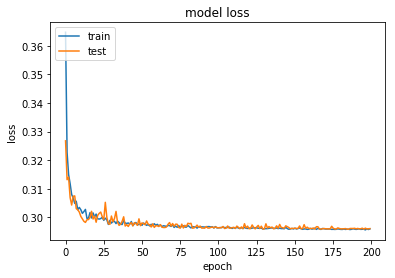

In [22]:
fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#fig.savefig('1.png',dpi=100)

In [23]:
# Use the autoencoder for predicting the images of test set.
decoded_imgs = autoencoder.predict(x_test)

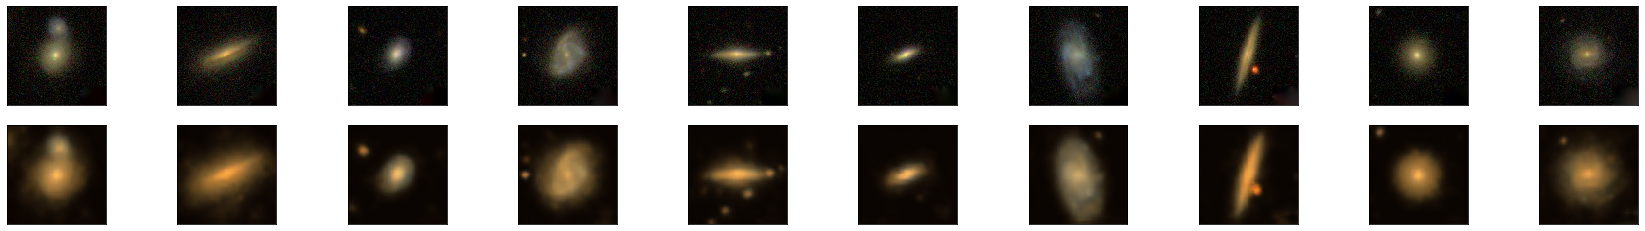

In [25]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10 # We will display 10 images of input images (SDSS) and decoded images for comparison
plt.figure(figsize=(30, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(80, 80, 4))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n +1)
    plt.imshow(decoded_imgs[i].reshape(80, 80, 3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

This is for improving the quality of the image i.e changing the brightness and contrast of the images.

In [28]:
# saving and loading model architecture in json format
 
# saving in json format
autoencoder.save('autoencoder_modelcolorfinalchanged1.removedh5')
 


In [12]:
#loading the model 
from keras.models import load_model
model1 = load_model('autoencoder_modelcolorfinalchanged1.removedh5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [13]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 4)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 64)      2368      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 16)        4624      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 50, 50, 16)        0         
__________

In [14]:
deco=model1.predict(x_train)

## Studying the properties and comparing the images with that of the DES and SDSS images

In [15]:
import skimage

In [16]:
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np

In [17]:
aa=[]
ab=[]
ac=[]
ad=[]
ae=[]
af=[]

In [18]:
decoded_imgs=deco

In [22]:
#ssim is for the structure similarities between the images.
#mse is for the mean square error between the images.
#psnr is the peak signal to noise ratio referred to actual and noisy image
i=0
while(i<1500):
    aa.append(skimage.measure.compare_ssim(decoded_imgs[i],y_train[i],multichannel=True))
    #ab.append(skimage.measure.compare_ssim(x_train[i],y_train[i],multichannel=True))
    ac.append(skimage.measure.compare_mse(decoded_imgs[i],y_train[i]))
    #ad.append(skimage.measure.compare_mse(x_train[i],y_train[i]))
    ae.append(skimage.measure.compare_psnr(y_train[i],decoded_imgs[i]))
    #af.append(skimage.measure.compare_psnr(y_train[i],x_train[i]))
    i+=1   

In [24]:
# Output in a single file
import openpyxl    
df_result=pd.DataFrame(list(zip(aa,ac,ae,)),columns=['decosim','decomse','decosnr'])
df_result.to_csv("imagesnrcolor205.csv")

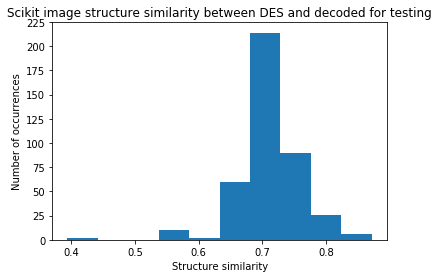

In [72]:
#plotting histograms to study distribution of the results
fig=plt.hist(aa)
plt.xlabel('Structure similarity')
plt.ylabel('Number of occurrences')
plt.title('Scikit image structure similarity between DES and decoded for testing')
plt.savefig('teststructuresimilarity.png')

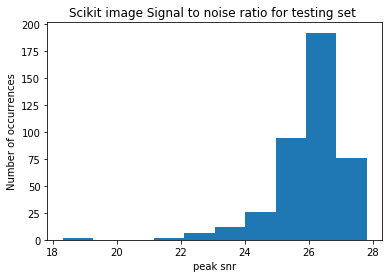

In [73]:
fig=plt.hist(ae)
plt.xlabel('peak snr')
plt.ylabel('Number of occurrences')
plt.title('Scikit image Signal to noise ratio for testing set ')
plt.savefig('testsnr.png')

In [20]:
# measurement of aperture photometry error
aa=[]
i=0
from skimage.color import rgb2gray
while(i<1500):
    from photutils import aperture_photometry
    from photutils import CircularAperture, CircularAnnulus
    positions = [(40.,40.)]
    apertures = CircularAperture(positions, r=3.)
    data=deco[i]
    data1=rgb2gray(data)
    error = 0.1*data1
    phot_table = aperture_photometry(data1, apertures, error=error)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output
        #print(phot_table)
    aa.append(phot_table)    
    i+=1    

In [21]:
import openpyxl
df_result=pd.DataFrame(list(zip(aa)),columns=['ID'])
df_result.to_csv("decodedaperture.csv")